# Set Up

## Init

### Installs

In [82]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
#from google.colab import files
#import sklearn
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import classification_report
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split


In [84]:
sns.set(rc={"figure.figsize":(16, 7)})

In [85]:
figure(num=None,figsize=(150,100),dpi=120,facecolor='w',edgecolor='k')

<Figure size 18000x12000 with 0 Axes>

<Figure size 18000x12000 with 0 Axes>

### Load CSV into Dataframe

In [86]:
#uploaded = files.upload()

In [87]:
df = pd.read_csv('dealer_suite_logins-weekly.csv').fillna(0)
df.head(7)

,Cohorts,6,7,8,9,10,11,12,13,14,...,42,43,44,45,46,47,48,49,50,51
0,6,2,1,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,1,1,0,0,0,1,0,0,...,1,1,0,1,0,1,1,1,1,1
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10,0,0,0,0,4,2,0,0,1,...,0,0,0,0,0,2,0,0,1,0
5,11,0,0,0,0,0,5,2,1,2,...,1,2,1,1,2,1,1,1,2,1
6,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Load Google Sheet into dataframe (for Colab)
Place the Colab file in the same folder as the Gsheet

In [88]:
#from google.colab import auth
#auth.authenticate_user()

In [89]:
#from google.auth import default
#import gspread
#creds, _ = default()
#gc = gspread.authorize(creds)

In [90]:
#worksheet = gc.open('Retention Analysis').sheet1
#df = worksheet.get_all_records()
#print(gsheet)

### Functions

In [91]:
def get_retention(dataframe):
  s = pd.Series(cohort_retention_percentage_weekscount.iloc[0])
  for i in range(len(dataframe)):
    s.iloc[i] = dataframe.T.iloc[i,0:].sum(axis=0)/dataframe.T.iloc[i,0:].notnull().sum()
  return s

## Watermark

In [92]:
watermark = "Alexandros Shomper"

# Create Cohort Charts

In [93]:
cohort_absolute_calendarweeks = pd.DataFrame(df).set_index(['Cohorts']) 
# Mulit Index: cohort_absolute_calendarweeks.set_index([pd.Index(cohort_absolute_calendarweeks.index), 'Cohorts'])
cohort_absolute_calendarweeks.name='Cohorts Absolute Calendar Weeks'
cohort_absolute_calendarweeks.fillna(0).replace([np.inf, -np.inf], 0, inplace=True)
cohort_absolute_calendarweeks

,6,7,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
Cohorts,,,,,,,,,,,,,,,,,,,,,
6,2,1,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,1,0,0,0,...,1,1,0,1,0,1,1,1,1,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,4,2,0,0,1,1,...,0,0,0,0,0,2,0,0,1,0
11,0,0,0,0,0,5,2,1,2,1,...,1,2,1,1,2,1,1,1,2,1
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,2,2,1,...,1,1,1,1,1,2,0,1,1,1
14,0,0,0,0,0,0,0,0,10,3,...,3,2,1,2,3,2,2,3,4,2


In [94]:
cohort_relative_calendarweeks = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)): 
  cohort_relative_calendarweeks.iloc[i] = cohort_absolute_calendarweeks.iloc[i].diff().fillna(cohort_absolute_calendarweeks.iloc[i])
cohort_relative_calendarweeks.name='Cohorts Relative Calendar Weeks'
cohort_relative_calendarweeks.replace([np.inf, -np.inf], 0, inplace=True)
cohort_relative_calendarweeks

,6,7,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
Cohorts,,,,,,,,,,,,,,,,,,,,,
6,2.0,-1.0,0.0,-1.0,0.0,2.0,-2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,-1.0,0.0,0.0,...,0.0,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,4.0,-2.0,-2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,-2.0,0.0,1.0,-1.0
11,0.0,0.0,0.0,0.0,0.0,5.0,-3.0,-1.0,1.0,-1.0,...,-1.0,1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,1.0,-1.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-2.0,1.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,-7.0,...,-2.0,-1.0,-1.0,1.0,1.0,-1.0,0.0,1.0,1.0,-2.0


In [95]:
cohort_retention_percentage_calendarweeks = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)):
  cohort_retention_percentage_calendarweeks.iloc[i] = cohort_absolute_calendarweeks.iloc[i].div(cohort_absolute_calendarweeks.iloc[i].values[i])
cohort_retention_percentage_calendarweeks.name='Cohorts Retention Percentage Calendar Weeks'
cohort_retention_percentage_calendarweeks.replace([np.inf, -np.inf], 0, inplace=True)
cohort_retention_percentage_calendarweeks

,6,7,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
Cohorts,,,,,,,,,,,,,,,,,,,,,
6,1.0,0.5,0.5,0.0,0.0,1.0,0.0,0.0,0.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.00,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0,0.25,0.25,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.250000,0.000000
11,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.2,0.40,0.20,...,0.200000,0.400000,0.200000,0.200000,0.400000,0.200000,0.200000,0.200000,0.400000,0.200000
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,0.50,...,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.000000,0.500000,0.500000,0.500000
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.30,...,0.300000,0.200000,0.100000,0.200000,0.300000,0.200000,0.200000,0.300000,0.400000,0.200000


In [96]:
cohort_churn_percentage_calendarweeks = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)):
  cohort_churn_percentage_calendarweeks.iloc[i] = 1-(cohort_absolute_calendarweeks.iloc[i].div(cohort_absolute_calendarweeks.iloc[i].values[i]))
cohort_churn_percentage_calendarweeks.name='Cohorts Retention Percentage Calendar Weeks'
cohort_churn_percentage_calendarweeks.replace([np.inf, -np.inf], 0, inplace=True)
cohort_churn_percentage_calendarweeks

,6,7,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
Cohorts,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.5,0.5,1.0,1.0,0.0,1.0,1.0,1.00,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.00,1.00,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.00,1.00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10,1.0,1.0,1.0,1.0,0.0,0.5,1.0,1.0,0.75,0.75,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,0.750000,1.000000
11,1.0,1.0,1.0,1.0,1.0,0.0,0.6,0.8,0.60,0.80,...,0.800000,0.600000,0.800000,0.800000,0.600000,0.800000,0.800000,0.800000,0.600000,0.800000
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.00,0.50,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,0.500000,0.500000,0.500000
14,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.00,0.70,...,0.700000,0.800000,0.900000,0.800000,0.700000,0.800000,0.800000,0.700000,0.600000,0.800000


In [97]:
cohort_absolute_weekscount = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns.get_loc(c) for c in cohort_absolute_calendarweeks.columns if c in cohort_absolute_calendarweeks], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_absolute_calendarweeks)): 
  s = pd.Series(cohort_absolute_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_absolute_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_absolute_weekscount.name='Cohorts Absolute Weeks Count'
cohort_absolute_weekscount.replace([np.inf, -np.inf], 0, inplace=True)
cohort_absolute_weekscount

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
Cohorts,,,,,,,,,,,,,,,,,,,,,
6,2,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN
8,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
10,4,2.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,...,0.0,2.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
11,5,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,...,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
13,2,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,10,3.0,5.0,6.0,2.0,5.0,5.0,2.0,2.0,3.0,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
cohort_relative_weekscount = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns.get_loc(c) for c in cohort_absolute_calendarweeks.columns if c in cohort_absolute_calendarweeks], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_relative_calendarweeks)): 
  s = pd.Series(cohort_relative_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_relative_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_relative_weekscount.name='Cohorts Relative Weeks Count'
cohort_relative_weekscount.replace([np.inf, -np.inf], 0, inplace=True)
cohort_relative_weekscount

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
Cohorts,,,,,,,,,,,,,,,,,,,,,
6,2.0,-1.0,0.0,-1.0,0.0,2.0,-2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,-1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,...,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9,1.0,0.0,0.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
10,4.0,-2.0,-2.0,0.0,1.0,0.0,-1.0,1.0,1.0,-2.0,...,0.0,2.0,-2.0,0.0,1.0,-1.0,NaN,NaN,NaN,NaN
11,5.0,-3.0,-1.0,1.0,-1.0,0.0,1.0,0.0,-1.0,0.0,...,-1.0,0.0,0.0,1.0,-1.0,NaN,NaN,NaN,NaN,NaN
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
13,2.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,10.0,-7.0,2.0,1.0,-4.0,3.0,0.0,-3.0,0.0,1.0,...,1.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
cohort_retention_percentage_weekscount = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns.get_loc(c) for c in cohort_absolute_calendarweeks.columns if c in cohort_absolute_calendarweeks], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_retention_percentage_calendarweeks)): 
  s = pd.Series(cohort_retention_percentage_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_retention_percentage_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_retention_percentage_weekscount.name='Cohorts Retention Percentage Weeks Count'
cohort_retention_percentage_weekscount.replace([np.inf, -np.inf], 0, inplace=True)
cohort_retention_percentage_weekscount

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
Cohorts,,,,,,,,,,,,,,,,,,,,,
6,1.0,0.500000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
7,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,NaN,NaN,NaN
10,1.0,0.500000,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.500000,0.000000,...,0.0,0.5,0.0,0.0,0.25,0.0,NaN,NaN,NaN,NaN
11,1.0,0.400000,0.200000,0.400000,0.200000,0.200000,0.400000,0.400000,0.200000,0.200000,...,0.2,0.2,0.2,0.4,0.20,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,1.0,1.000000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,...,0.5,0.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,1.0,0.300000,0.500000,0.600000,0.200000,0.500000,0.500000,0.200000,0.200000,0.300000,...,0.4,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
def calc_retention(dataframe): 
  s = pd.Series(cohort_retention_percentage_weekscount.iloc[0])
  for i in range(len(dataframe)):
    s.iloc[i] = dataframe.T.iloc[i,0:].sum(axis=0)/dataframe.T.iloc[i,0:].notnull().sum()
  return s

In [101]:
calc_retention(cohort_retention_percentage_weekscount)

0     1.000000
1     0.474562
2     0.290190
3     0.226952
4     0.234587
5     0.252708
6     0.169271
7     0.187606
8     0.171237
9     0.105836
10    0.160363
11    0.206061
12    0.149378
13    0.084595
14    0.076514
15    0.086703
16    0.081817
17    0.076920
18    0.055238
19    0.076130
20    0.172246
21    0.102417
22    0.180645
23    0.116040
24    0.091785
25    0.153892
26    0.104810
27    0.152759
28    0.171968
29    0.132335
30    0.138687
31    0.194419
32    0.169444
33    0.233333
34    0.240000
35    0.188889
36    0.262500
37    0.200000
38    0.283333
39    0.080000
40    0.290000
41    0.250000
42    0.333333
43    0.500000
44    0.500000
45    0.000000
Name: 6, dtype: float64

In [102]:
cohort_churn_percentage_weekscount = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns.get_loc(c) for c in cohort_absolute_calendarweeks.columns if c in cohort_absolute_calendarweeks], index=cohort_absolute_calendarweeks.index)
for i in range(len(cohort_churn_percentage_calendarweeks)): 
  s = pd.Series(cohort_churn_percentage_calendarweeks.iloc[i].values[i:])
  for j in range(len(s)):
    cohort_churn_percentage_weekscount.iloc[i].values[j] = s.iloc[j]
cohort_churn_percentage_weekscount.name='Cohorts Churn Percentage Weeks Count'
cohort_churn_percentage_weekscount.replace([np.inf, -np.inf], 0, inplace=True)
cohort_churn_percentage_weekscount

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
Cohorts,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.500000,0.500000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,1.0
7,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,1.0,1.00,1.0,1.0,NaN,NaN,NaN
10,0.0,0.500000,1.000000,1.000000,0.750000,0.750000,1.000000,0.750000,0.500000,1.000000,...,1.0,0.5,1.0,1.0,0.75,1.0,NaN,NaN,NaN,NaN
11,0.0,0.600000,0.800000,0.600000,0.800000,0.800000,0.600000,0.600000,0.800000,0.800000,...,0.8,0.8,0.8,0.6,0.80,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.0,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000,0.500000,0.500000,...,0.5,0.5,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0.0,0.700000,0.500000,0.400000,0.800000,0.500000,0.500000,0.800000,0.800000,0.700000,...,0.6,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## User Activities

### Active Users

In [103]:
active_users = pd.DataFrame(cohort_absolute_calendarweeks.sum(axis=0).astype(int), columns=['Active Users']).astype(object).T
active_users.name='Active Users'
active_users.replace([np.inf, -np.inf], 0, inplace=True)
active_users.fillna(0, inplace = True)
active_users

,6,7,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
Active Users,2,2,2,1,5,10,3,3,16,9,...,24,22,31,53,71,66,44,78,71,43


### Churned Users

In [104]:
churned_users = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks < 0].sum(axis=0).astype(int), columns=['Churned Users']).astype(object).T
churned_users.name='Churned Users'
churned_users.columns=active_users.columns
churned_users.replace([np.inf, -np.inf], 0, inplace=True)
churned_users.fillna(0, inplace = True)
churned_users

,6,7,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
Churned Users,0,-1,0,-2,0,-2,-8,-2,0,-10,...,-15,-10,-8,-9,-18,-31,-37,-10,-22,-34


### New Users

In [105]:
new_users = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks < 0].sum(axis=0).astype(int), columns=['New Users']).astype(object).T
for i in range(len(cohort_absolute_calendarweeks)):
  new_users.iloc[0].values[i]=cohort_absolute_calendarweeks.iloc[i].values[i]
  #print(cohort_absolute_calendarweeks.iloc[i].values[i])
new_users.columns=active_users.columns
new_users.replace([np.inf, -np.inf], 0, inplace=True)
new_users.fillna(0, inplace = True)
new_users

,6,7,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
New Users,2,1,0,1,4,5,0,2,10,3,...,1,7,8,21,24,14,12,13,9,2


### Resurrected Users

In [106]:
resurrected_users = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks > 0].sum(axis=0).astype(int), columns=['Resurrected Users']).astype(object)
for i in range(len(cohort_absolute_calendarweeks)):
  resurrected_users.iloc[i] = resurrected_users.iloc[i]-cohort_absolute_calendarweeks.iloc[i].values[i]
resurrected_users =resurrected_users.T
resurrected_users.columns=active_users.columns
resurrected_users.replace([np.inf, -np.inf], 0, inplace=True)
resurrected_users.fillna(0, inplace = True)
resurrected_users

,6,7,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
Resurrected Users,0,0,0,0,0,2,1,0,3,0,...,2,1,9,10,12,12,3,31,6,4


### Retained Users

In [107]:
retained_users = pd.DataFrame(active_users, columns=active_users.columns).astype(object)
for i in range(len(retained_users)):
  retained_users.iloc[i]=active_users.iloc[i]-new_users.iloc[i]-resurrected_users.iloc[i]
retained_users.replace([np.inf, -np.inf], 0, inplace=True)
retained_users.fillna(0, inplace = True)
retained_users.index = ['Retained Users']
retained_users

,6,7,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
Retained Users,0,1,2,0,1,3,2,1,3,6,...,21,14,14,22,35,40,29,34,56,37


### Quick Ratio

In [108]:
quick_ratio = pd.DataFrame(cohort_relative_calendarweeks[cohort_relative_calendarweeks < 0].sum(axis=0).astype(int), columns=['Quick Ratio']).astype(object).T
for i in range(len(cohort_absolute_calendarweeks)):
  quick_ratio.iloc[0].values[i]=(new_users.iloc[0].values[i]+resurrected_users.iloc[0].values[i])/(churned_users.iloc[0].values[i]*-1)
quick_ratio.columns=active_users.columns
quick_ratio.replace([np.inf, -np.inf], 0, inplace=True)
quick_ratio.fillna(0, inplace = True)
quick_ratio

/var/folders/77/x8lbl6xx731flpt0yh3y4qx00000gn/T/ipykernel_17541/126271693.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  quick_ratio.iloc[0].values[i]=(new_users.iloc[0].values[i]+resurrected_users.iloc[0].values[i])/(churned_users.iloc[0].values[i]*-1)
/var/folders/77/x8lbl6xx731flpt0yh3y4qx00000gn/T/ipykernel_17541/126271693.py:3: RuntimeWarning: invalid value encountered in scalar divide
  quick_ratio.iloc[0].values[i]=(new_users.iloc[0].values[i]+resurrected_users.iloc[0].values[i])/(churned_users.iloc[0].values[i]*-1)


,6,7,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
Quick Ratio,0,1.0,0.0,0.5,0,3.5,0.125,1.0,0,0.3,...,0.2,0.8,2.125,3.444444,2.0,0.83871,0.405405,4.4,0.681818,0.176471


### User Activity

In [109]:
user_activity = pd.DataFrame(columns=[cohort_absolute_calendarweeks.columns], index=["Active Users", "Retained Users", "New Users","Churned Users", "Resurrected Users"])
user_activity.loc['Active Users']=active_users.iloc[0].values
user_activity.loc['New Users']=new_users.iloc[0].values
user_activity.loc['Retained Users']=retained_users.iloc[0].values
user_activity.loc['Churned Users']=churned_users.iloc[0].values
user_activity.loc['Resurrected Users']=resurrected_users.iloc[0].values
user_activity.loc['Quick Ratio']=quick_ratio.iloc[0].values
user_activity

,6,7,8,9,10,11,12,13,14,15,...,42,43,44,45,46,47,48,49,50,51
Active Users,2,2,2,1,5,10,3,3,16,9,...,24,22,31,53,71,66,44,78,71,43
Retained Users,0,1,2,0,1,3,2,1,3,6,...,21,14,14,22,35,40,29,34,56,37
New Users,2,1,0,1,4,5,0,2,10,3,...,1,7,8,21,24,14,12,13,9,2
Churned Users,0,-1,0,-2,0,-2,-8,-2,0,-10,...,-15,-10,-8,-9,-18,-31,-37,-10,-22,-34
Resurrected Users,0,0,0,0,0,2,1,0,3,0,...,2,1,9,10,12,12,3,31,6,4
Quick Ratio,0.0,1.0,0.0,0.5,0.0,3.5,0.125,1.0,0.0,0.3,...,0.2,0.8,2.125,3.444444,2.0,0.83871,0.405405,4.4,0.681818,0.176471


### User Retention

In [110]:
get_retention(cohort_retention_percentage_weekscount)

0     1.000000
1     0.473855
2     0.284196
3     0.233627
4     0.241695
5     0.229355
6     0.174732
7     0.193859
8     0.177142
9     0.109756
10    0.166302
11    0.213986
12    0.155124
13    0.087979
14    0.079702
15    0.090473
16    0.085536
17    0.080583
18    0.058000
19    0.080137
20    0.154995
21    0.107808
22    0.190153
23    0.122147
24    0.096615
25    0.161991
26    0.110632
27    0.161745
28    0.182716
29    0.141157
30    0.148594
31    0.209375
32    0.183565
33    0.254545
34    0.264000
35    0.209877
36    0.295312
37    0.228571
38    0.330556
39    0.096000
40    0.348000
41    0.312500
42    0.444444
43    0.750000
44    0.750000
45    0.000000
Name: 6, dtype: float64

# Retention Plotting

## User Activity

### Active Users Chart
This chart tells you how many users have been active in each time period (months, weeks, or days).

#### What you want to see
* **Each single timeperiod should ideally have a higher bar then the timeperiod before**
* **Ideally this chart should show an overall upwards trend:** indicating growth

#### What you don't want to see
* **Overall downward trend or stagnation:** You are either loosing a lot of users, or not gaining new ones
* **Drops in one or more time periods:** This can indicate a bug, security issue, low performing acquisition, etc.


Text(3, 60, 'Alexandros Shomper')

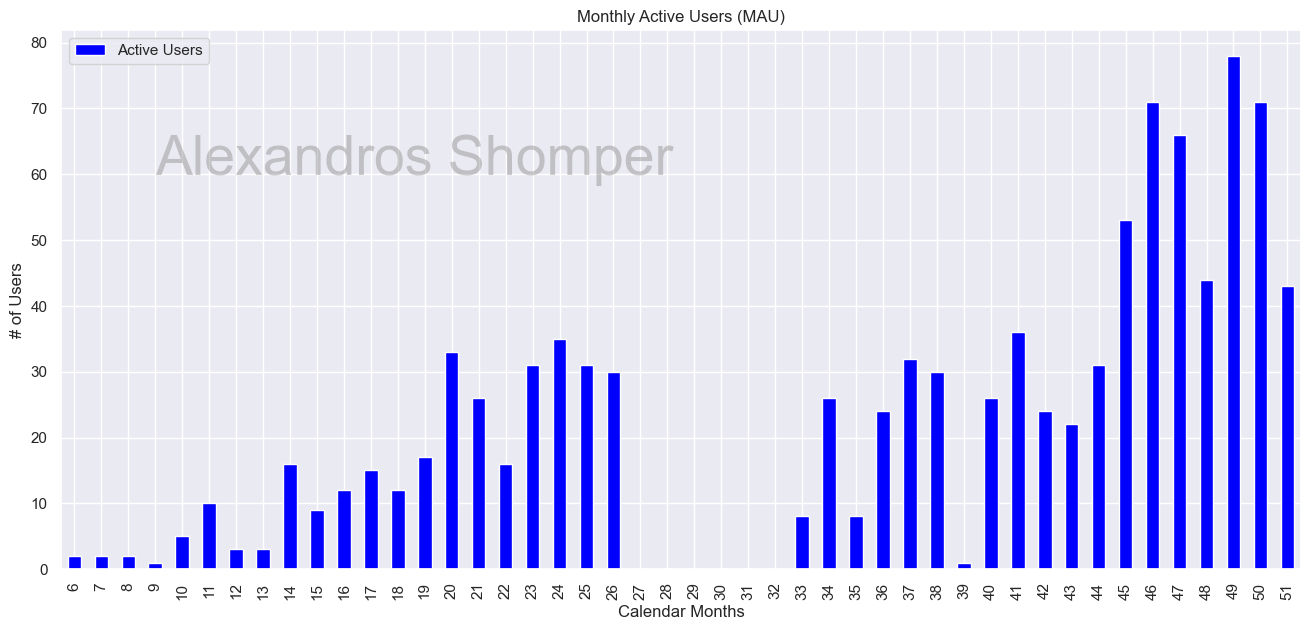

In [111]:
active_users_chart = active_users.T.plot(kind='bar', color='blue').set(title='Monthly Active Users (MAU)', xlabel='Calendar Months', ylabel='# of Users')
plt.text(3, 60, watermark, fontsize=40, color='gray', alpha=0.4, zorder=1)

### Lifecycle Chart
*Aggregated charts can hide users churning!*

*While the "Active Users Chart" can give high-level indication of your products health & growth, it lacks the granularity to really understand what is happening.*

The Lifecycle Chart adds this granularity and tells you:
1. How many of those active users are new users.
2. How many are retained users.
3. How many users have churned (not used the product)
4. How many users were resurrected (started using the product again).

#### What you want to see
* **Majority is retained users:** Your product is keeping its users, which means they see value in it.
* **Retained users grow over timeperiod** You convince more and more users to stick around, maybe existing users are referring your product. Retaining the same amout of users over 6 months is not good enough. 

#### What you don't want to see
* **New users overweighing retained users:** Your user activity relies on constantly acquiring new users. This is not sustainable growth.
* **Churned users overweighting New Users:** You are loosing more users than you gain new users. This is a leaking bucket.

Text(3, 60, 'Alexandros Shomper')

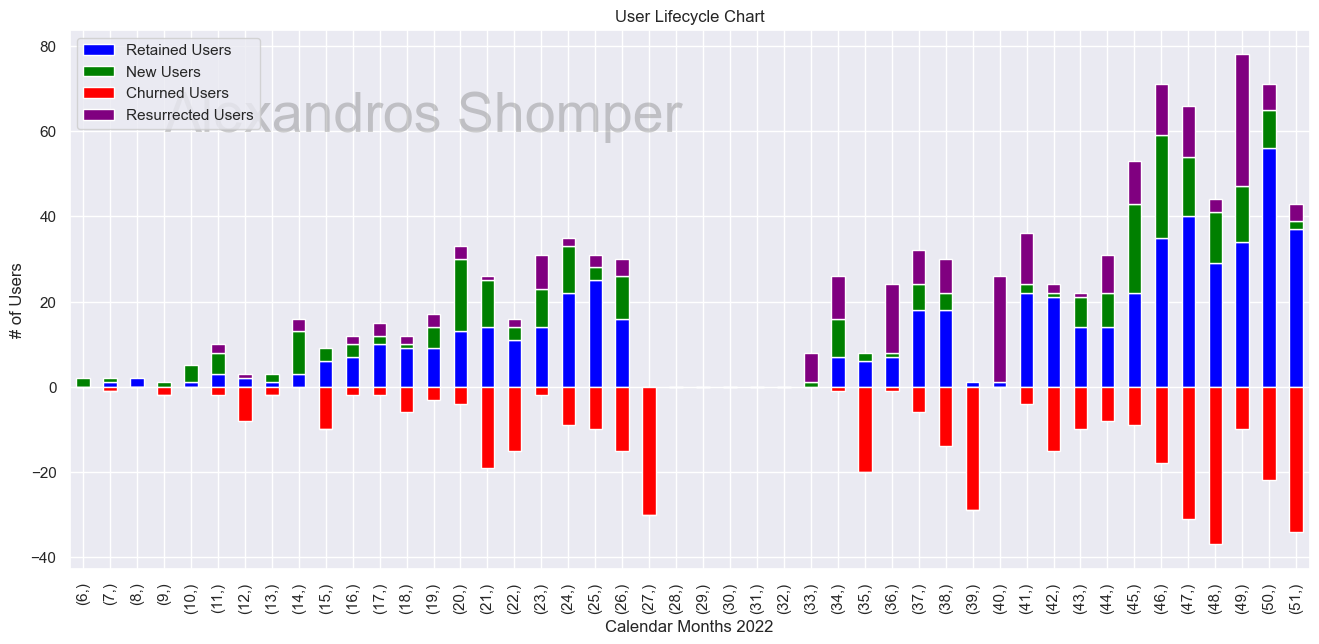

In [112]:
lifecycle_chart = user_activity.loc['Retained Users':'Resurrected Users'].T.plot(kind='bar', stacked=True, color=['blue', 'green','red','purple']).set(title='User Lifecycle Chart', xlabel='Calendar Months 2022', ylabel='# of Users')
plt.text(3, 60, watermark, fontsize=40, color='gray', alpha=0.4, zorder=1)

Text(3, 60, 'Alexandros Shomper')

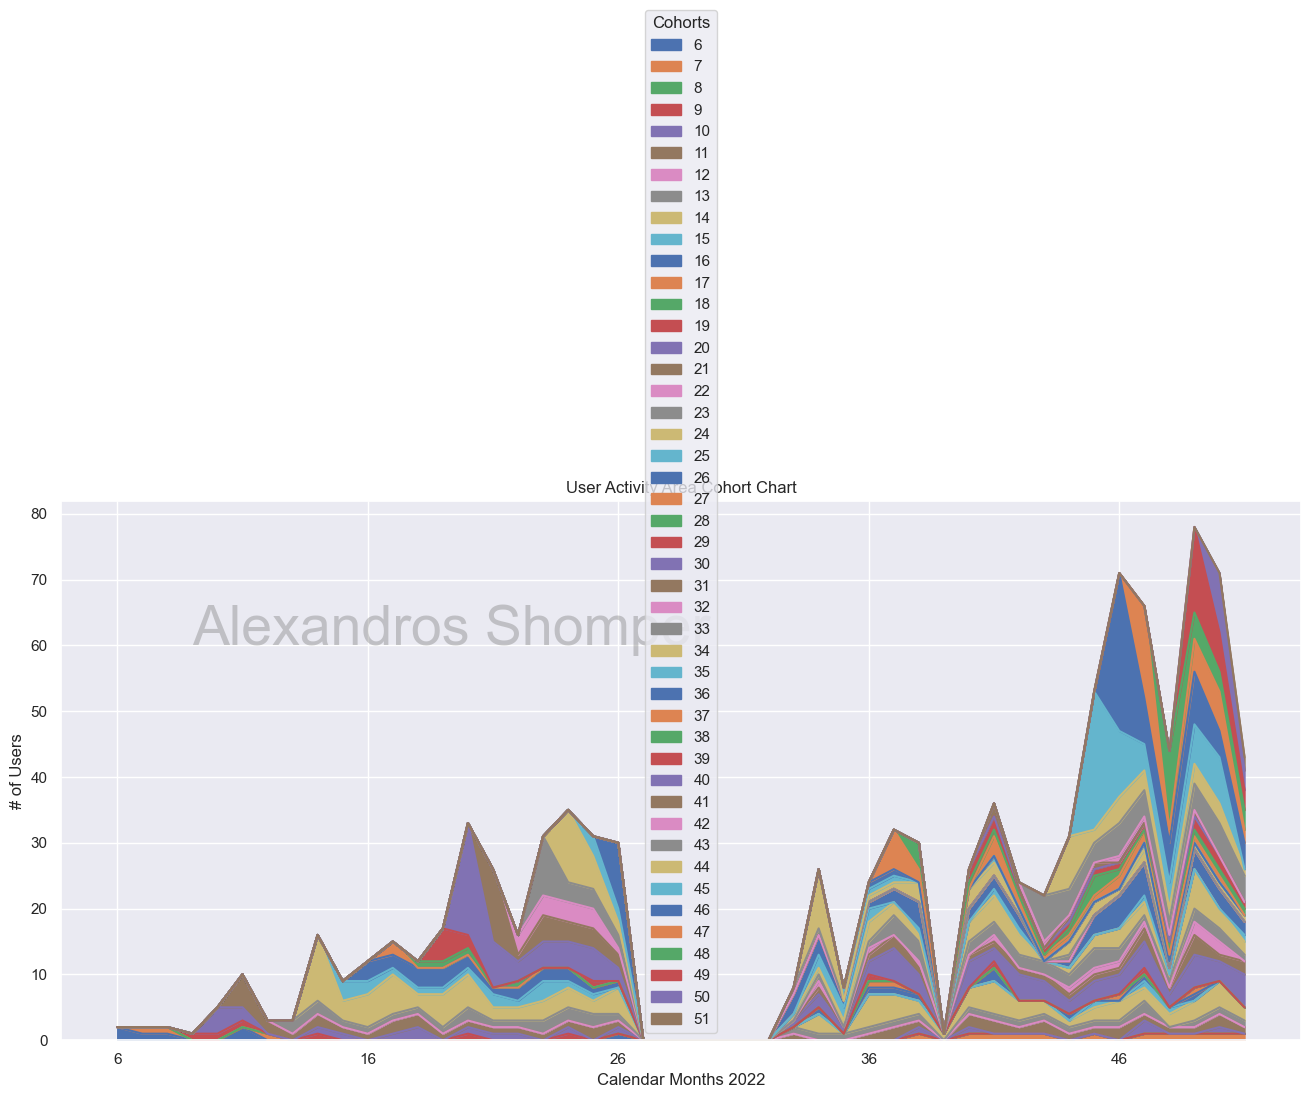

In [113]:
user_activity_area = cohort_absolute_calendarweeks.iloc[0:].T.plot(kind='area', stacked=True).set(title='User Activity Area Cohort Chart', xlabel='Calendar Months 2022', ylabel='# of Users')
plt.text(3, 60, watermark, fontsize=40, color='gray', alpha=0.4, zorder=1)

## Cohort Charts

### Retention Cohort Percentage
This shows the percentage of users stayed after a certain timeperiod.

Text(0, 0, 'Alexandros Shomper')

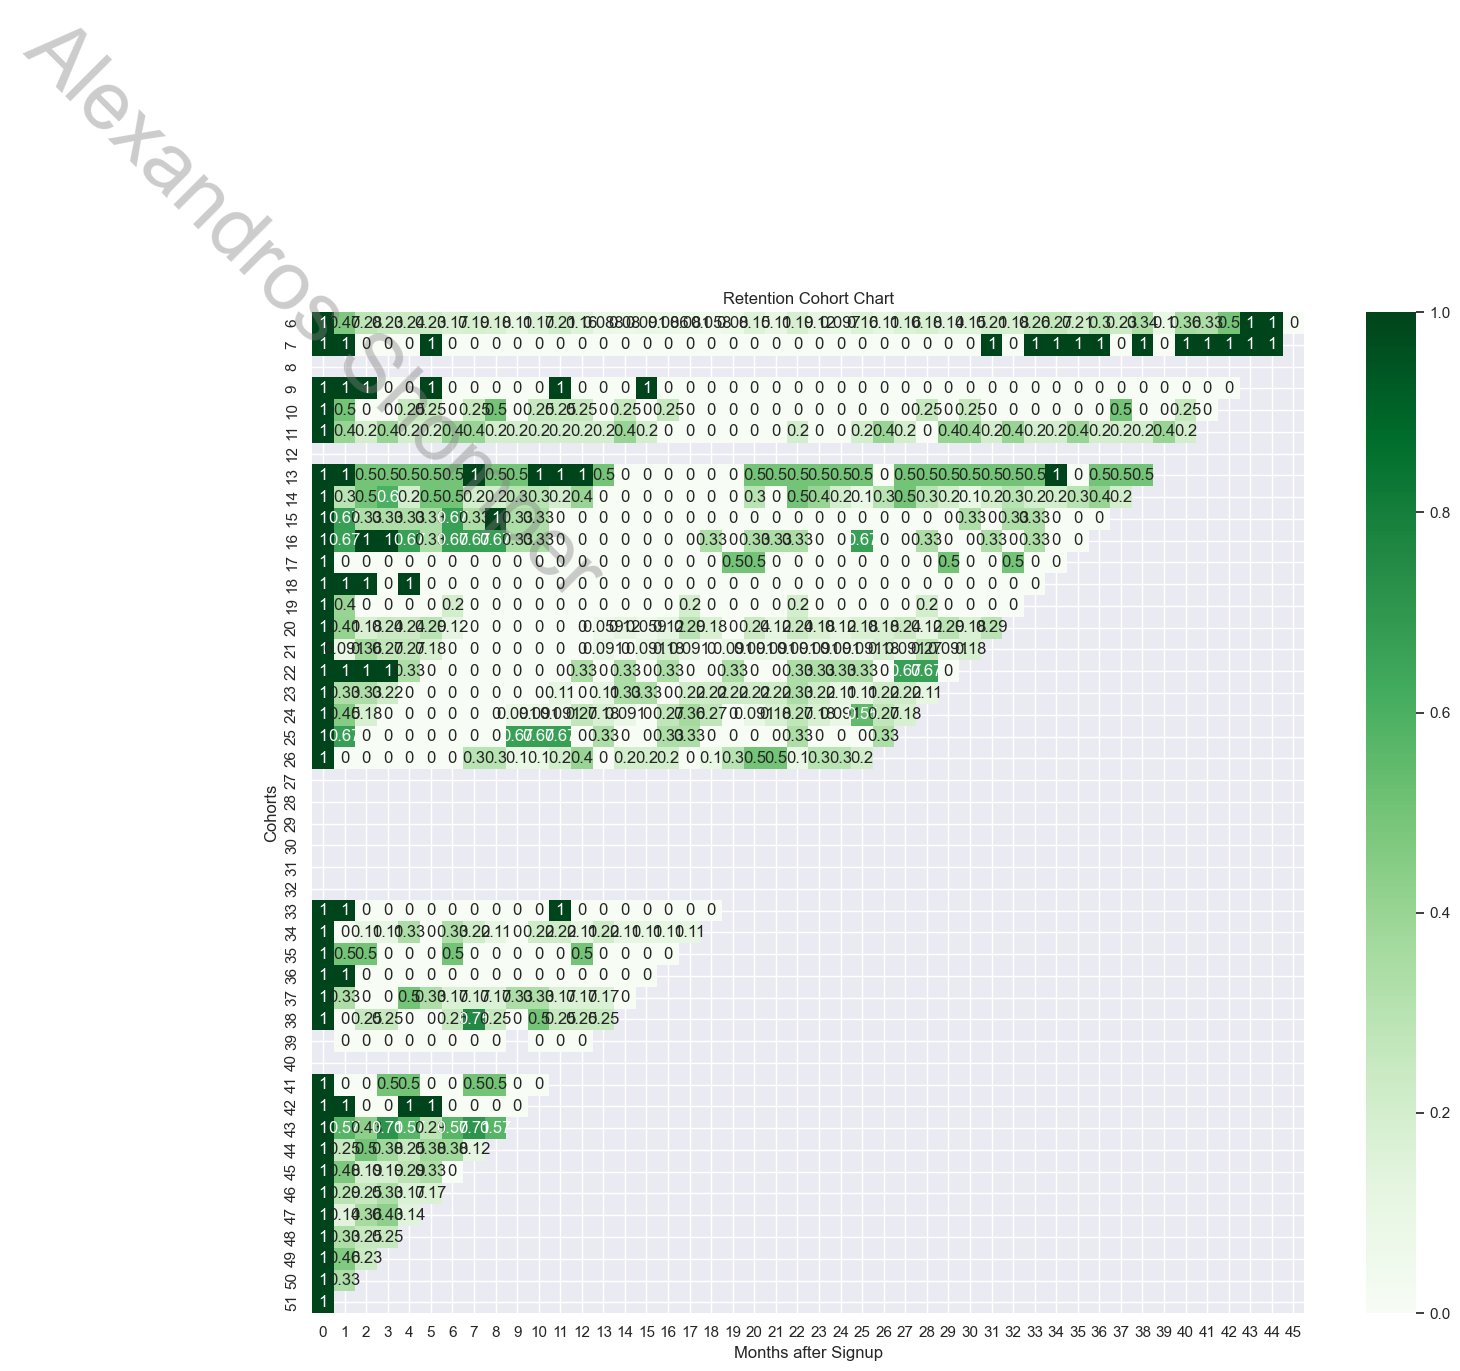

In [128]:
plt.figure(figsize=(16, 13))
retention_cohortchart = sns.heatmap(cohort_retention_percentage_weekscount, cmap="Greens", annot=True).set(title='Retention Cohort Chart', xlabel='Months after Signup')
plt.text(0, 0, watermark, fontsize=60, color='gray', alpha=0.4, rotation=-45, va='center', ha='center', zorder=1)

### Churn Cohort Percentage
This shows the percentage of the starting cohort that was lost in each time period. 

Text(0, 15, 'Alexandros Shomper')

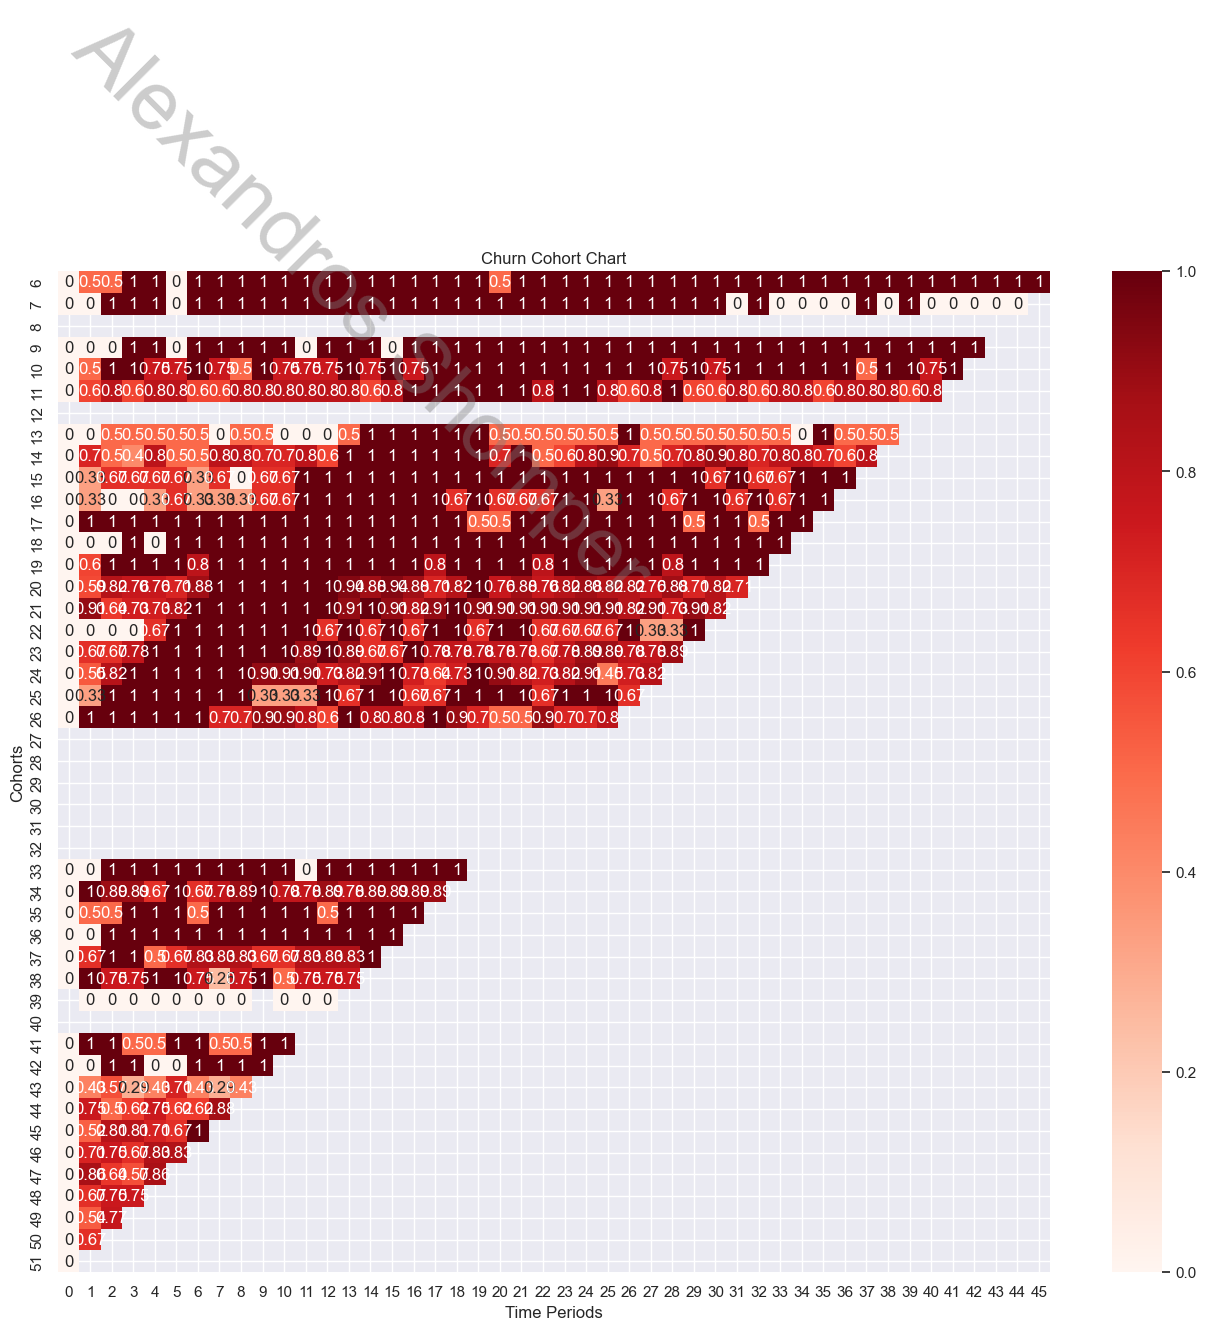

In [127]:
plt.figure(figsize=(16, 13))
churn_cohortchart = sns.heatmap(cohort_churn_percentage_weekscount, cmap="Reds", annot=True).set(title='Churn Cohort Chart', xlabel='Time Periods')
plt.text(0, 15, watermark, fontsize=60, color='gray', alpha=0.4, rotation=-45, zorder=1)

## Retention

### Average Retention Curve

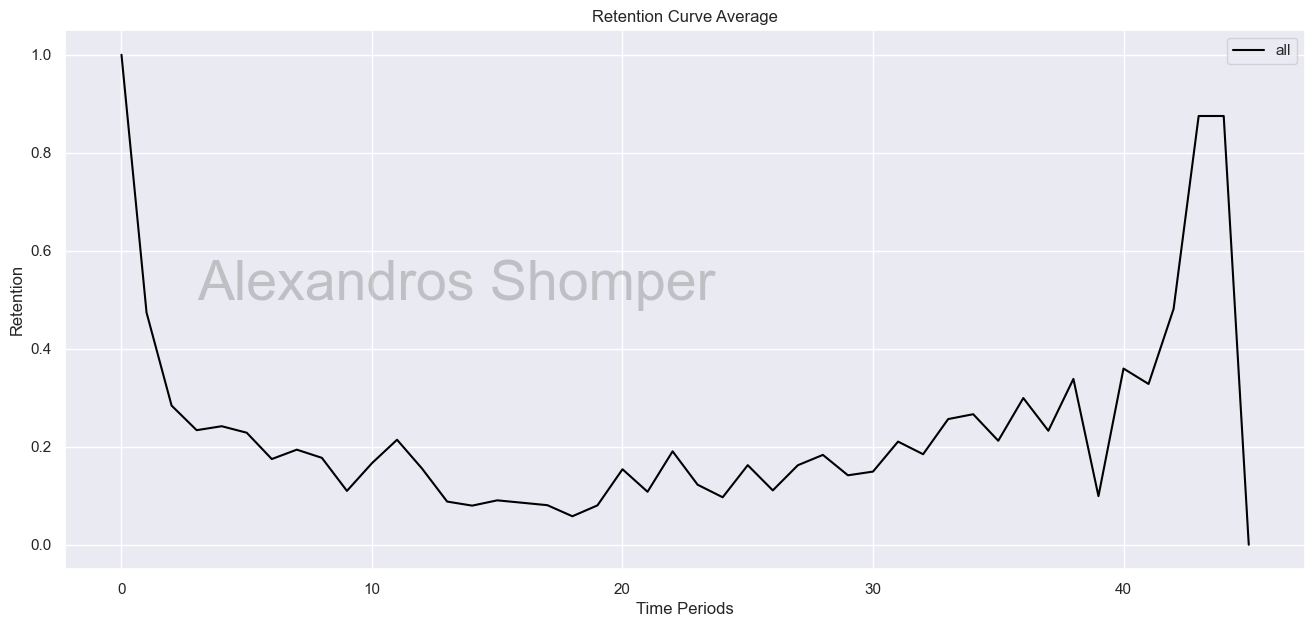

In [116]:
#plt.figure(figsize=(16, 7))
plt.title("Retention Curve Average")
plt.xlabel("Time Periods")
plt.ylabel("Retention")
plt.plot(get_retention(cohort_retention_percentage_weekscount),color='black', label="all")
plt.legend()
plt.text(3, 0.5, watermark, fontsize=40, color='gray', alpha=0.4, zorder=1)
plt.show()

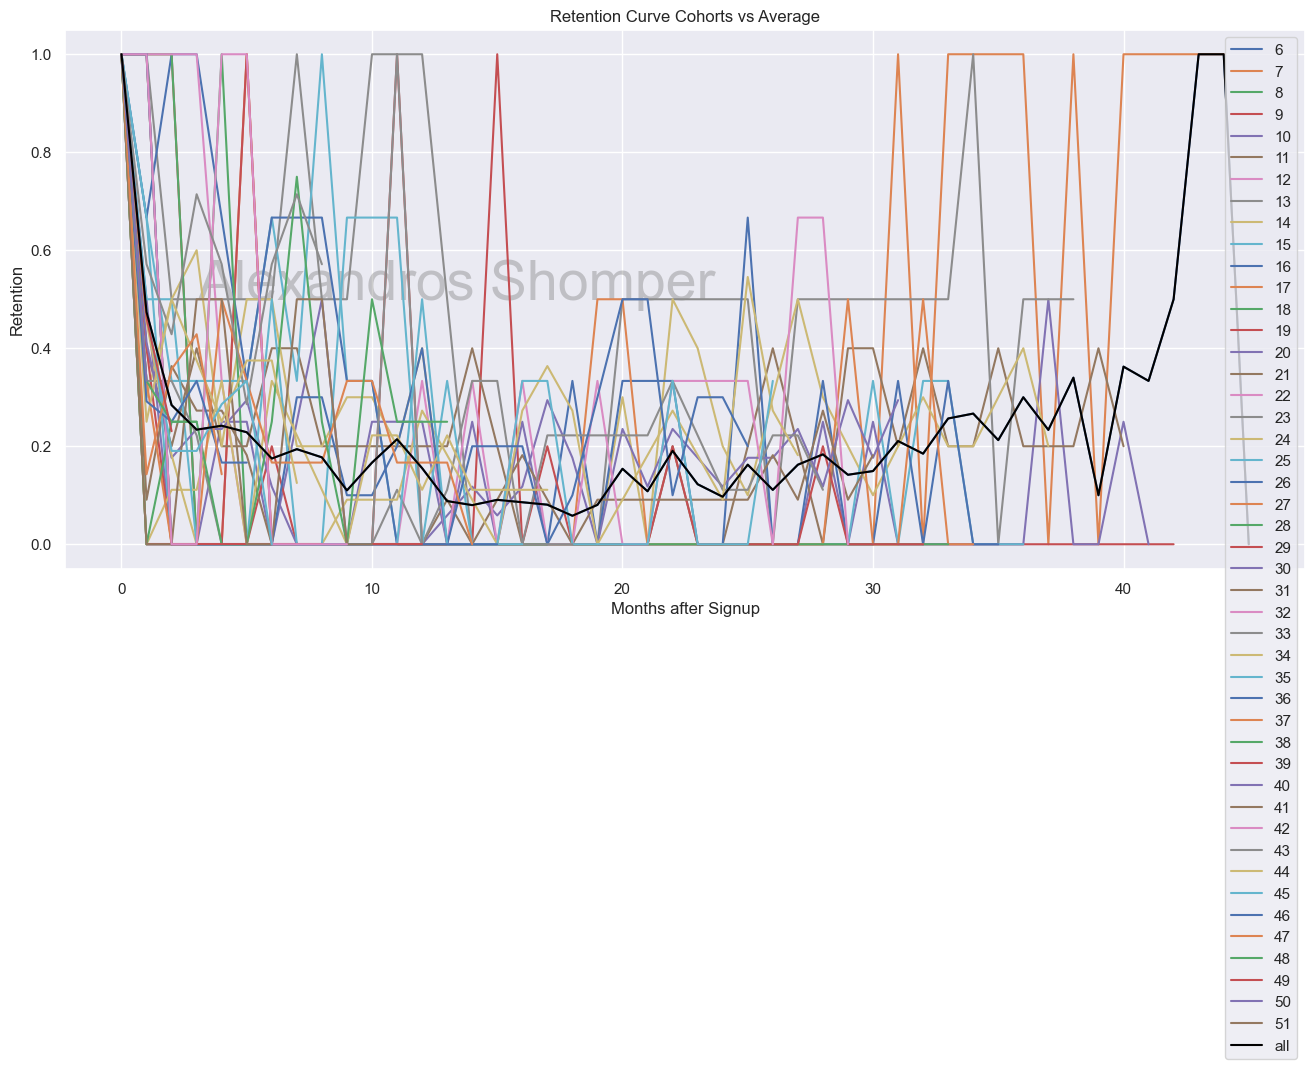

In [123]:
plt.title("Retention Curve Cohorts vs Average")
plt.xlabel("Months after Signup")
plt.ylabel("Retention")
for i in range(len(cohort_retention_percentage_weekscount)): 
  plt.plot(cohort_retention_percentage_weekscount.iloc[i].index, cohort_retention_percentage_weekscount.iloc[i].values, label=cohort_retention_percentage_weekscount.iloc[i].name)
plt.plot(get_retention(cohort_retention_percentage_weekscount), color='black', label="all")
plt.legend()
plt.text(3, 0.5, 'Alexandros Shomper', fontsize=40, color='gray', alpha=0.4, zorder=1)
plt.show()

# Numbers & Trends

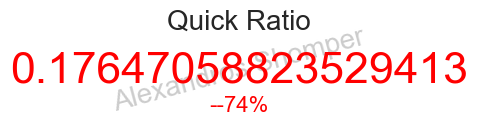

In [118]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

quick_ratio_score = plt
fig = quick_ratio_score.figure(figsize=(3, 1))
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

x=quick_ratio.iloc[0].values[-2]
y=quick_ratio.iloc[0].values[-1]
z=y-x

#Metric
ax.text(0.5*(left+right), 0.8*(bottom+top)+0.05, 'Quick Ratio',
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=20,
        transform=ax.transAxes)
#Value
if y < 1:
            ax.text(0.5*(left+right), 0.5*(bottom+top), y,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=32, color='red',
            transform=ax.transAxes)

elif y > 1:
            ax.text(0.5*(left+right), 0.5*(bottom+top), y,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=32, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.5*(bottom+top), y,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=32, color='black',
            transform=ax.transAxes)

#Trend
if z/x < 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "-"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='red',
            transform=ax.transAxes)

elif z/x > 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "+"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='black',
            transform=ax.transAxes)

ax.set_axis_off()
plt.text(0.5, 0.5, watermark, transform=ax.transAxes, fontsize=20, color='gray', alpha=0.4, ha='center', va='center', rotation=15, zorder=1)
quick_ratio_score.show()

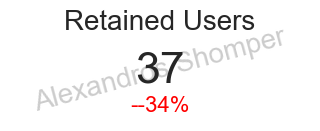

In [119]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

retained_users_score = plt
fig = retained_users_score.figure(figsize=(3, 1))
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)

x=user_activity.loc['Retained Users'].values[-2]
y=user_activity.loc['Retained Users'].values[-1]
z=y-x

#Metric
ax.text(0.5*(left+right), 0.8*(bottom+top)+0.05, 'Retained Users',
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=20,
        transform=ax.transAxes)
#Value
ax.text(0.5*(left+right), 0.5*(bottom+top), y,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=32,
        transform=ax.transAxes)
#Trend

if z/x < 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "-"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='red',
            transform=ax.transAxes)

elif z/x > 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "+"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='black',
            transform=ax.transAxes)

ax.set_axis_off()
plt.text(0.5, 0.5, watermark, transform=ax.transAxes, fontsize=20, color='gray', alpha=0.4, ha='center', va='center', rotation=15, zorder=1)
retained_users_score.show()

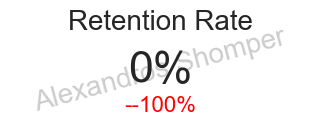

In [120]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

retention_rate_score = plt
fig = retention_rate_score.figure(figsize=(3, 1))
ax = fig.add_axes([0,0,1,1])

# axes coordinates are 0,0 is bottom left and 1,1 is upper right
p = patches.Rectangle(
    (left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False
    )

ax.add_patch(p)
x=get_retention(cohort_retention_percentage_weekscount).values[-2]
y=get_retention(cohort_retention_percentage_weekscount).values[-1]
z=y-x
#Metric
ax.text(0.5*(left+right), 0.8*(bottom+top)+0.05, 'Retention Rate',
        horizontalalignment='center',
        verticalalignment='bottom',
        fontsize=20,
        transform=ax.transAxes)
#Value
ax.text(0.5*(left+right), 0.5*(bottom+top), "{0:.0f}%".format(y * 100),
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=32,
        transform=ax.transAxes)
#Trend
if z/x < 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "-"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='red',
            transform=ax.transAxes)
elif z/x > 0:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "+"+"{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='green',
            transform=ax.transAxes)
else:
            ax.text(0.5*(left+right), 0.3*(bottom+top)-0.05, "{0:.0f}%".format(z/x * 100),
            horizontalalignment='center',
            verticalalignment='top',
            fontsize=16, color='black',
            transform=ax.transAxes)

ax.set_axis_off()
plt.text(0.5, 0.5, watermark, transform=ax.transAxes, fontsize=20, color='gray', alpha=0.4, ha='center', va='center', rotation=15, zorder=1)
retention_rate_score.show()